In [25]:
import tensorflow as tf

In [26]:
#Other imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [27]:
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2025-12-17 00:58:50--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv.1’

moore.csv.1         100%[===================>]   2.25K  --.-KB/s    in 0s      

2025-12-17 00:58:50 (32.7 MB/s) - ‘moore.csv.1’ saved [2302/2302]



In [28]:
!head moore.csv

1971,2300
1972,3500
1973,2500
1973,2500
1974,4100
1974,4500
1974,8000
1975,3510
1976,5000
1976,8500


In [29]:
#Load in the data
data = pd.read_csv('moore.csv',header=None).to_numpy()

In [30]:
data[:5]

array([[1971, 2300],
       [1972, 3500],
       [1973, 2500],
       [1973, 2500],
       [1974, 4100]])

In [31]:
data.shape

(162, 2)

In [32]:
#Split the dataset into input and target
#X must be 2D (N,D) for ML models, even with a single feature (N,1)
X = data[:,0].reshape(-1,1)
#Y can remain as 1D (N,)
Y = data[:,1]

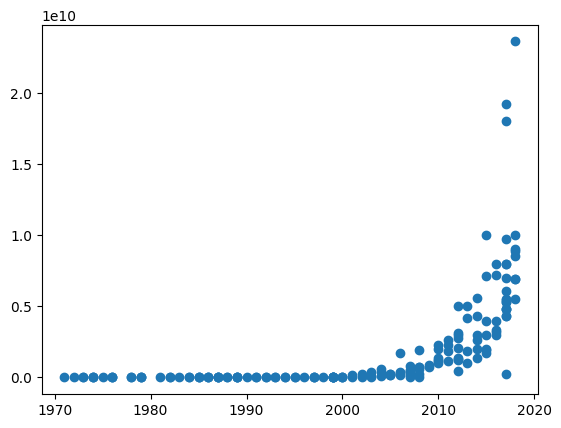

In [33]:
#Plot data :)
plt.scatter(X,Y)

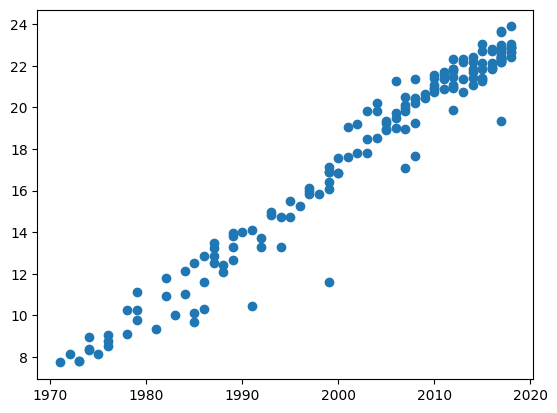

In [34]:
Y = np.log(Y)
plt.scatter(X,Y)

In [35]:
# Mean-centering the input feature to improve numerical stability
# does not change the scale, only shifts the origin :3
X = X - X.mean()

In [36]:
model = tf.keras.models.Sequential(
    [
        #Just one feature
        tf.keras.layers.Input(shape=(1,)),
        #1 output
        tf.keras.layers.Dense(1),
    ]
)

In [37]:
model.compile(
    optimizer= tf.keras.optimizers.SGD(0.001,0.9),
    loss='mse'
)

In [38]:
def schedule(epoch,lr):
  if epoch >=50:
    return 0.0001
  return 0.001

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

In [39]:
r = model.fit(X,Y,epochs=200,callbacks=[scheduler])

Epoch 1/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 420.8207 - learning_rate: 0.0010
Epoch 2/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 404.5527 - learning_rate: 0.0010
Epoch 3/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 384.4178 - learning_rate: 0.0010
Epoch 4/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 313.6091 - learning_rate: 0.0010
Epoch 5/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 225.4101 - learning_rate: 0.0010
Epoch 6/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 160.6626 - learning_rate: 0.0010
Epoch 7/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 102.0571 - learning_rate: 0.0010
Epoch 8/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 73.3043 - learning_rate: 0.0010
Epoch 9/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 57.6649 - learning_rate: 0.0010
Epoch 10/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 57.4275 - learning_rate: 0.0010
Epoch 11/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 62.0939 - learning_rate: 0.0010
Epoch 12/200

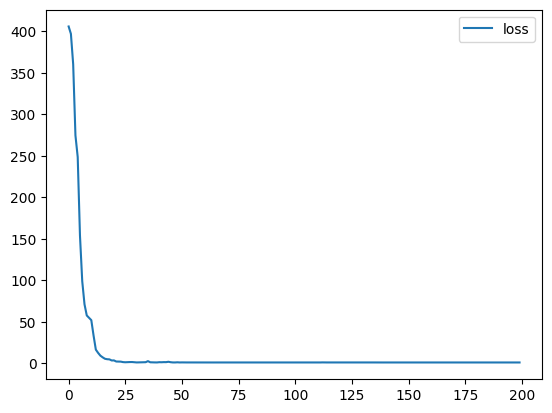

In [40]:
from prompt_toolkit.shortcuts.progress_bar import Label
#Plot the loss :0
plt.plot(r.history['loss'],label='loss')
plt.legend()

In [41]:
model.layers

[<Dense name=dense_1, built=True>]

In [42]:
model.layers[0].get_weights()

[array([[0.34153694]], dtype=float32), array([17.752312], dtype=float32)]

In [43]:
a = model.layers[0].get_weights()[0][0,0]
a

np.float32(0.34153694)

# Moore's law
## 1. Exponentional growth model
Moore's Law states that the number of transistors on an integraded circuit will double every two years.

We start with the exponential growth model:

$$
C(t) = A_0 r^t
$$

Where:
- $C$ is the number of transistors
- $A_0$ is the initial transistors count
- $r$ is the rate of growth
- $t$ is time (in years)

This model **is not linear**

## 2. Making the model linear using logarithms
To apply linear regression, we take the logarithm of both sides:

$$
\log C = \log(A_0 r^t)
$$

Usign logarithmic properties:

$$
\log C = \log A_0 + t \log r
$$

This is our linear equation:

$$
\hat{y} = ax + b
$$

Where:
- $\hat{y} = \log C$
- $x = t$
- $a = \log r$
- $b = \log A_0$

If Moore's law holds, the plot of $\log C$ versus time should be approximately a straight line.

We are interested in $r$, because that's the rate of growth. Given our regression weights, we know that:

$$
a = 0.3428679
$$

so:

$$
r = e^{0.3428679} = 1.40898
$$

We are interested in how long it takes for the transistor count to double. We simply need to find the amount of time it takes for $C$ to increase to $2C$

Let:
- $C = A_0 r^t$
- $2C = A_0 r^{t'}$

Dividing the two equations:

$$
\frac{2C}{C} = r^{(t' - t)}
\quad \Rightarrow \quad
2 = r^{(t' - t)}
$$

Taking logarithms:

$$
\log 2 = (t' - t)\log r
$$

Solving for the time difference:

$$
t' - t = \frac{\log 2}{\log r}
$$

Since $\log r = a$:

$$
t' - t = \frac{\log 2}{a}
$$






In [44]:
#Approximately 2 years (we didn't scale the data)
print("Time to double: ", np.log(2) / a)

Time to double:  2.0294940345162056


In [45]:
#Analitical solution
X = X.flatten() #Ensures x is a 1D array so dot products work correctly :v
denominator = X.dot(X) - X.mean() * X.sum()
a = (X.dot(Y) - Y.mean() * X.sum()) / denominator
b = (Y.mean() * X.dot(X) - X.mean() * X.dot(Y)) / denominator
print(a,b)


0.341682487387313 17.764939393631764


In [46]:
print("Time to double: ", np.log(2) / a)

Time to double:  2.0286295205239204
